# 1D Convolutional Network

As you remember, 2D Convolutional layer helps us to extract some patterns in images. Similarly, we are using 1D Convolutional layer to find some patterns in sequential data. It is good alternative to RNN models.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

### Loading Imdb Dataset

Variables:

* `max_features` = number of words to consider as features
* `max_len` = truncate texts after this number of words

In [2]:
max_features = 10000  
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [3]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

### Creating Model With 1D Convolutional Layer

* At the beginning of model we used 128 dimensional Embedding layer
* Then, 2x 1D convolutional layer and max pooling
* Global max pooling = same as MaxPooling1D, but downsizing the tensor dimension with taking the max value of all channels

In [82]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=8,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_57 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_129 (Conv1D)          (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 98, 32)            0         
_________________________________________________________________
conv1d_130 (Conv1D)          (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 32)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

After 8th epoch model stops improving and tents to overfit.

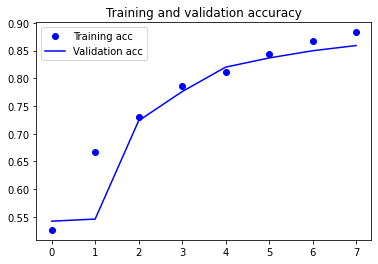

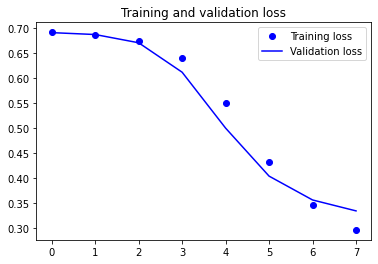

In [60]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Let's improve our model a bit with applying following options:

* Replace our GlobalMaxPooling layer with LSTM
* Downsize our Word Embedding dimensions to 64 for more computational efficiency
* Use `adam` optiomizer instead

In [61]:
model = Sequential()
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_56 (Embedding)     (None, 500, 64)           640000    
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 498, 32)           6176      
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 249, 32)           0         
_________________________________________________________________
conv1d_114 (Conv1D)          (None, 247, 32)           3104      
_________________________________________________________________
lstm_52 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 65        
Total params: 674,177
Trainable params: 674,177
Non-trainable params: 0
_______________________________________________

After 2nd epoch model tents to overfit but if we stopped our model after 2nd epoch we will get 0.88 validation accuracy.

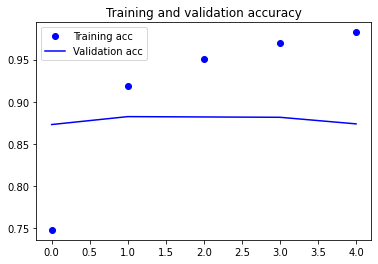

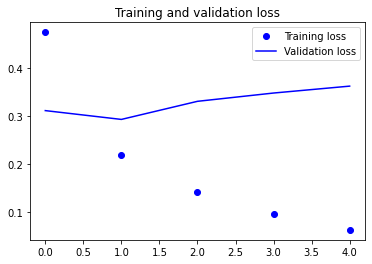

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluating Jena Climate Dataset with Conv1D Layer

In [65]:
df = pd.read_csv('jena_climate_2009_2016.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


* Let's plot the temprature (degree Celsius) for each time steps

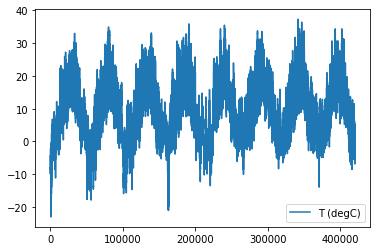

In [66]:
df[['T (degC)']].plot()

* Temprature over the first 10 days of the dataset (*C)
* Since the 10 day period coming from winter, tempratures are mostly below 0 *C

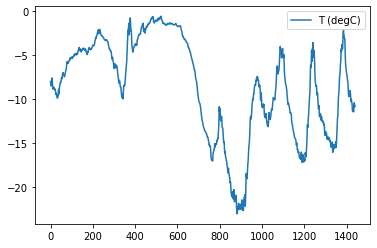

In [67]:
df[['T (degC)']].iloc[:1440].plot()

#### Data Pre-processing

In [68]:
float_data = df.iloc[:, 1:].values
mean = np.mean(float_data[:200000, :], axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [69]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(row - lookback, row, step)
            samples[j] = data[indices]
            targets[j] = data[row + delay][1]
        yield samples, targets

In [70]:
lookback = 1440
step = 3
delay = 144
batch_size = 128

Variables:

* train_gen = Generator for train data (first 200k samples of data)
* val_gen = Generator for validation data (100k samples after training data)
* test_gen = Generator for test data (rest of the data)
* val_steps = Applied steps for validation data in each epoch
* test_steps = Applied steps for test data during evaluation

In [71]:
train_gen = generator(float_data, lookback=lookback, delay=delay, min_index = 0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001, max_index=300000, step=step, batch_size=batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=300001, max_index=None, step=step, batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [76]:
model = Sequential()
model.add(layers.Conv1D(32, 3, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.LSTM(32, recurrent_regularizer='l2'))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer='adam', loss='mae')
history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=5,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_123 (Conv1D)          (None, None, 32)          1376      
_________________________________________________________________
max_pooling1d_63 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_124 (Conv1D)          (None, None, 32)          3104      
_________________________________________________________________
lstm_56 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 33        
Total params: 12,833
Trainable params: 12,833
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
500/500 [==============================] - 23s 46ms/step - loss: 0.3639 - val_loss: 0.2812
Epoch 2/5
500/

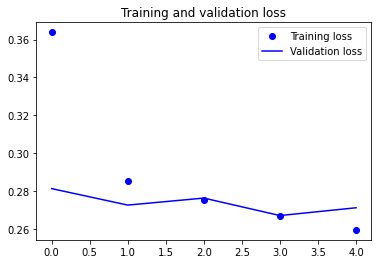

In [77]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Consequently, Although word embedding and RNNs alone yields better results, 1D ConvNets makes our model much faster than using RNN alone since it downsizing inputs, similarly as we seen in Conv2D models. Thus, training models with long sequence data takes less time.